In [6]:
from glob import glob
import os
import pandas as pd

#read all dcm files into train and text
train = sorted(glob("./data/dicom-images-train/*/*/*.dcm"))
test = sorted(glob("./data/dicom-images-test/*/*/*.dcm"))
print("train files: ", len(train))
print("test files: ", len(test))

pd.reset_option('max_colwidth')

#reading the csv
print("the csv with the labels: -1 means no Pneumothorax, othervise there is an encoding for the place of Pneumothorax")
masks = pd.read_csv("./data/train-rle.csv", delimiter=",")
masks.head()

train files:  10712
test files:  1377
the csv with the labels: -1 means no Pneumothorax, othervise there is an encoding for the place of Pneumothorax


,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [7]:
import pydicom
import matplotlib.pyplot as plt

#displaying metadata
data = pydicom.dcmread(train[0])
print(data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '17d405a3-a0d2-4901-b33a-63906aa48d9f'
(0010, 0020) Patient ID                          LO: '17d405a3-a0d2-4901-b33a-63906aa48d9f'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's

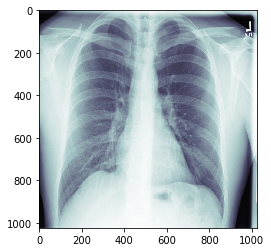

In [8]:
#displaying the image
img = pydicom.read_file(train[0]).pixel_array
plt.imshow(img, cmap='bone')
plt.grid(False)

In [19]:
#dataframe to ease the access
patients = []
missing = 0
miss_ID = []

for t in train:
    data = pydicom.dcmread(t)
    patient = {}
    patient["UID"] = data.SOPInstanceUID
    try:
        encoded_pixels = masks[masks["ImageId"] == patient["UID"]].values[0][1]
        patient["EncodedPixels"] = encoded_pixels
    except:
        missing = missing + 1
        miss_ID.append(patient["UID"])
        
    patient["Age"] = data.PatientAge
    patient["Sex"] = data.PatientSex
    patient["Modality"] = data.Modality
    patient["BodyPart"] = data.BodyPartExamined
    patient["ViewPosition"] = data.ViewPosition
    patient["path"] = "./data/dicom-images-train/" + data.StudyInstanceUID + "/" + \
                        data.SeriesInstanceUID + "/" + data.SOPInstanceUID + ".dcm"
    patients.append(patient)

print("missing labels: ", missing)
#pd.set_option('display.max_colwidth', -1)
df_patients = pd.DataFrame(patients, columns=["UID", "EncodedPixels", "Age", "Sex", "Modality", "BodyPart", "ViewPosition", "path"])
print("images with labels: ", df_patients.shape[0])
df_patients.head()

missing labels:  37
images with labels:  10712


,UID,EncodedPixels,Age,Sex,Modality,BodyPart,ViewPosition,path
0,1.2.276.0.7230010.3.1.4.8323329.1000.151787516...,-1,38,M,CR,CHEST,PA,./data/dicom-images-train/1.2.276.0.7230010.3....
1,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,-1,10,F,CR,CHEST,AP,./data/dicom-images-train/1.2.276.0.7230010.3....
2,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,-1,50,F,CR,CHEST,AP,./data/dicom-images-train/1.2.276.0.7230010.3....
3,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,-1,68,F,CR,CHEST,AP,./data/dicom-images-train/1.2.276.0.7230010.3....
4,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,-1,65,M,CR,CHEST,AP,./data/dicom-images-train/1.2.276.0.7230010.3....


In [23]:
#Listing all missing ID
for val in miss_ID:
    print ("Missing patient ID: ", val)    

Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.10231.1517875222.737143
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.10362.1517875223.377845
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.10407.1517875223.567351
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.10599.1517875224.488727
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.1068.1517875166.144255
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.11104.1517875231.169401
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.11215.1517875231.757436
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.11557.1517875233.601090
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.11566.1517875233.640521
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.11577.1517875233.694347
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.11584.1517875233.731531
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.12062.1517875237.179186
Missing patient ID:  1.2.276.0.7230010.3.1.4.8323329.13378.1517875244.961609
